### Lab-3 Report
By: Aniket Tiwari   
ID: 8866818

#### Primary Goal:
This report aims to examine the predictive power of median house values with respect to median income, population size, and number of households. We seek to determine the strength of these relationships using linear regression analysis in order to obtain insights into the dynamics of the housing market, which can help different stakeholders—including investors and policymakers—make decisions. The study offers a data-driven knowledge of house prices and assesses how well these variables predict.

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Getting the data: 
The dataset used in this report can be found on Kaggle, under the title [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices/data).

In [3]:
# Importing the dataset
file_path = 'D:/00=Conestoga/Level-1/Foundations of Machine Learning/housing.csv'  
housingpPrices = pd.read_csv(file_path)
housingpPrices.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


### Exploratory Data Analysis (EDA):

In [18]:
housingpPrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are a total of 20,640 records in the dataset. 

#### Missing Values

In [17]:
missing_values = housingpPrices.isnull().sum()
missing_values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Based on the total number of records in the data the missing values for the total_bedrooms seems to be minimal. Looking at some of the rows where null values exist:

In [19]:
null_total_bedrooms = housingpPrices[housingpPrices['total_bedrooms'].isnull()]
null_total_bedrooms.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
738,-122.14,37.67,37.0,3342.0,NaN,1635.0,557.0,4.7933,186900.0,NEAR BAY
1097,-121.77,39.66,20.0,3759.0,NaN,1705.0,600.0,4.7120,158600.0,INLAND
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,143100.0,INLAND
1456,-121.98,37.96,22.0,2987.0,NaN,1420.0,540.0,3.6500,204100.0,INLAND
1493,-122.01,37.94,23.0,3741.0,NaN,1339.0,499.0,6.7061,322300.0,NEAR BAY


#### Removing null values

In [20]:
housingpPrices_cleaned = housingpPrices.dropna(subset=['total_bedrooms'])
housingpPrices_cleaned.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [21]:
housingpPrices_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


#### Statistical Measures  

In [22]:
statisticalMeasures = housingpPrices_cleaned.describe()
statisticalMeasures

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Visualizing the Correlations between the variables

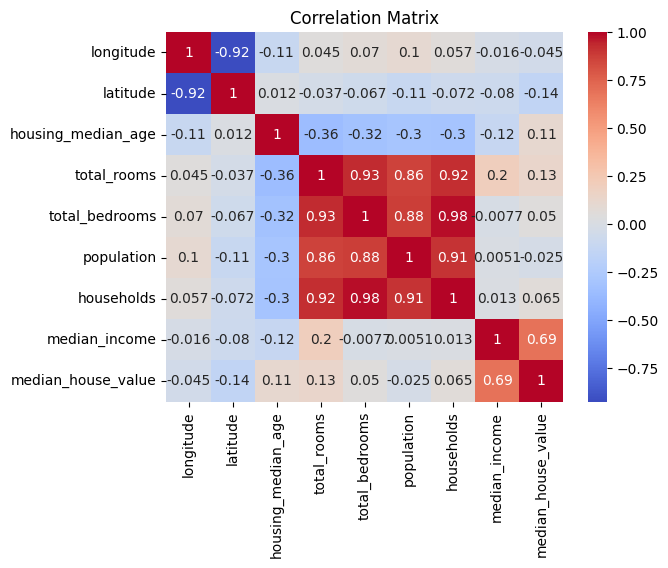

In [23]:
numerical_data = housingpPrices_cleaned.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**Some important correlations to consider:**   

Strong Positive Correlations:
- Total Rooms and Total Bedrooms: 0.930380
- Total Bedrooms and Households: 0.979728
- Population and Households: 0.907186

Significant Positive Correlation:
- Median Income and Median House Value: 0.688355

#### Histogram

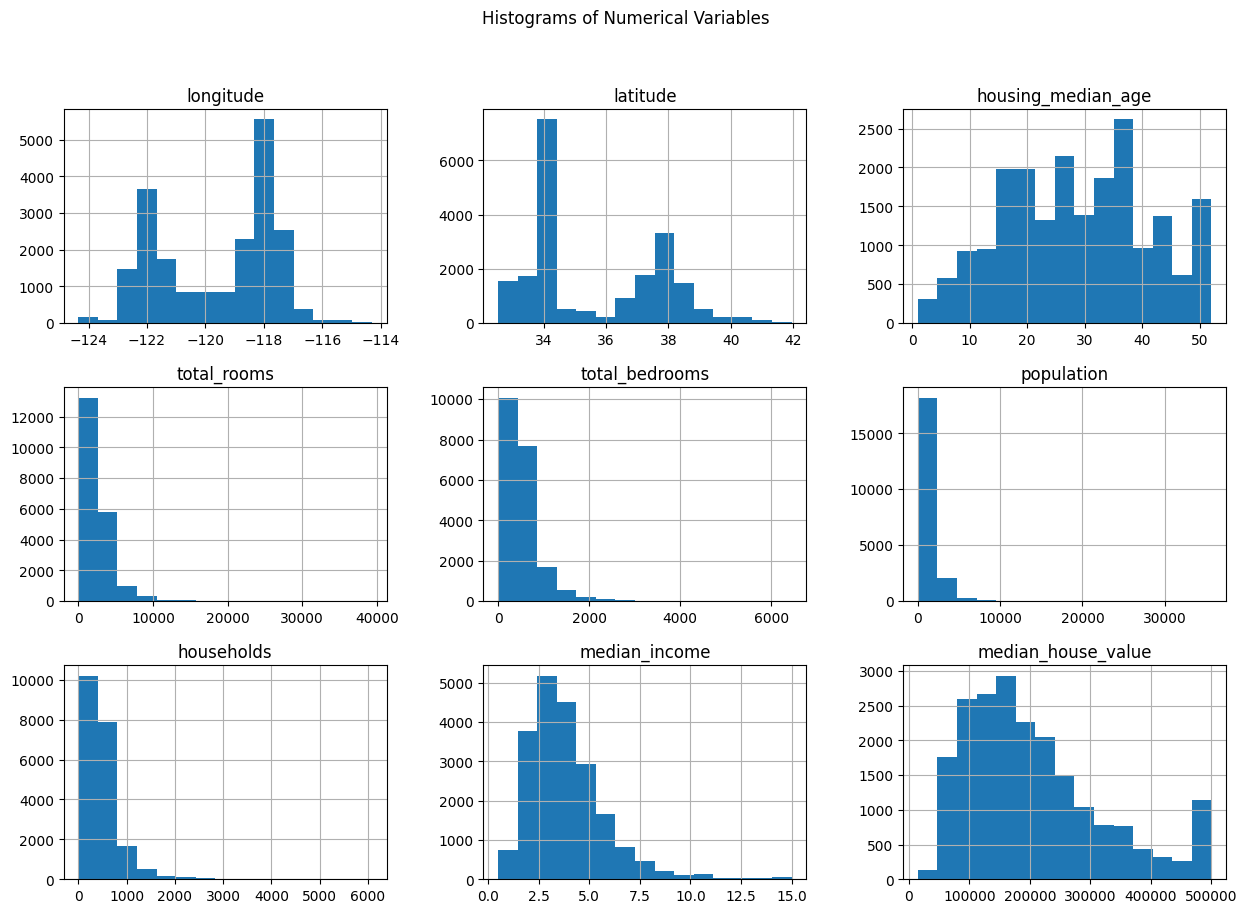

In [15]:
numerical_data.hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Variables")
plt.show()

**Based on the histogram:**
- The housing median age histogram exhibits a somewhat uniform distribution across a range of ages, with a minor increase in frequency observed for residences that are approximately 50 years old. 
- The histograms for the total number of rooms and bedrooms are both right-skewed, indicating that while some homes have very big numbers, most homes have fewer numbers overall.
- The population histogram has a right-skewed distribution, characterised by a minority of highly populated places and a majority of low-population areas.
- Similar to the population and total rooms/bedrooms histograms, the households histogram is also right-skewed, showing that most places have fewer households overall, with a small number of areas having a large number of households.
- The right-skewed distribution of the median income histogram indicates that most locations have lower median incomes, while a smaller number of areas have relatively high median incomes.
- In addition to being right-skewed, the median house value histogram has a noticeable frequency spike at the higher end of the house value range. This shows that there are a sizable number of homes with high valuations, even though the majority of homes are valued at the lower end.

#### The variables considered for the lab:
1. The **median house value** ranges from $14,999 to $500,001, with a mean of $206,864.41 and a standard deviation of $115,435.67. The maximum value may indicate a cap in the dataset.
2. The **median income** ranges from 0.4999 to 15.0001, with a mean of 3.8712 and standard deviation of 1.8993, indicating economic diversity among districts.
3. The **population** ranges from 3 to 35,682, with a mean of 1,424.95 and a standard deviation of 1,133.21, indicating a diverse set of districts.
4. The **number of households** in a district varies from 1 to 6,082, with a mean of 499.43 and a standard deviation of 382.30, indicating diverse living arrangements.

The data suggests potential capping, wide range and high standard deviation in house values, potential income scale, broad distribution of median incomes, large variation in population sizes, unusually low minimum value for districts, and wide range of household numbers. These factors could affect analysis and may require further investigation. The data's wide range and high standard deviation may also indicate economic diversity, complicating analyses assuming uniform economic conditions. The low minimum value for a district could indicate data errors or outliers. The wide range of household numbers also indicates diverse living situations.

#### Scatter Plots 

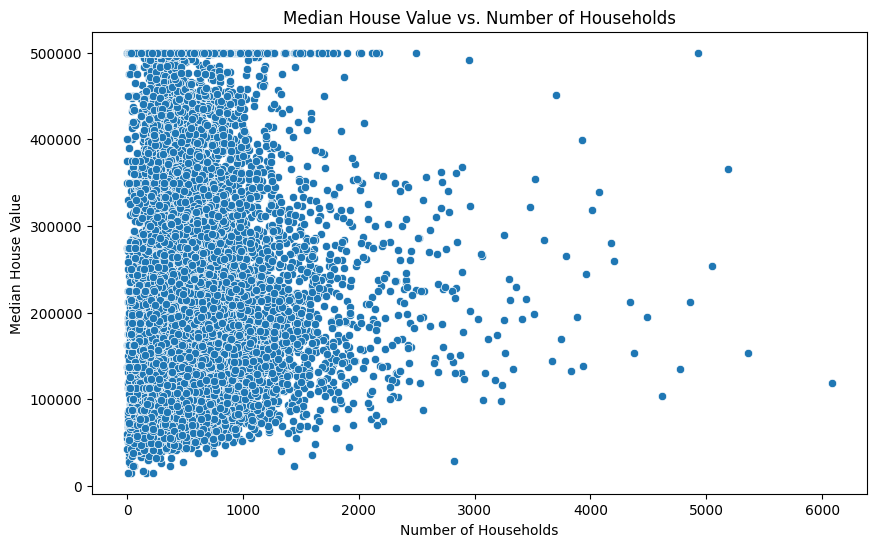

In [29]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=housingpPrices_cleaned, x='households', y='median_house_value')
ax.set_title('Median House Value vs. Number of Households')  
ax.set_xlabel('Number of Households')
ax.set_ylabel('Median House Value')
plt.show()

The scatter plot "Median House Value vs. Number of Households" shows no clear linear correlation between the number of households and median house values. A dense cluster of data points indicates a smaller number of households in most districts. The median house value has horizontal lines at higher values, suggesting common price points or similar house groups.

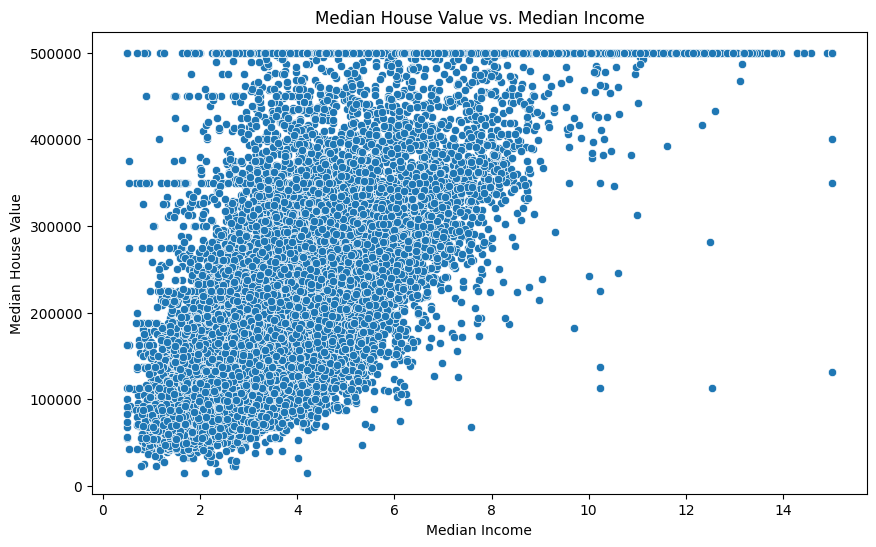

In [30]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=housingpPrices_cleaned, x='median_income', y='median_house_value')
ax.set_title('Median House Value vs. Median Income') 
ax.set_xlabel('Median Income')
ax.set_ylabel('Median House Value')
plt.show()

The scatter plot shows a positive correlation between median income and median house value, with a concentration of points at lower income levels. Higher median incomes may cause plateaus in house values, possibly due to housing market limitations.

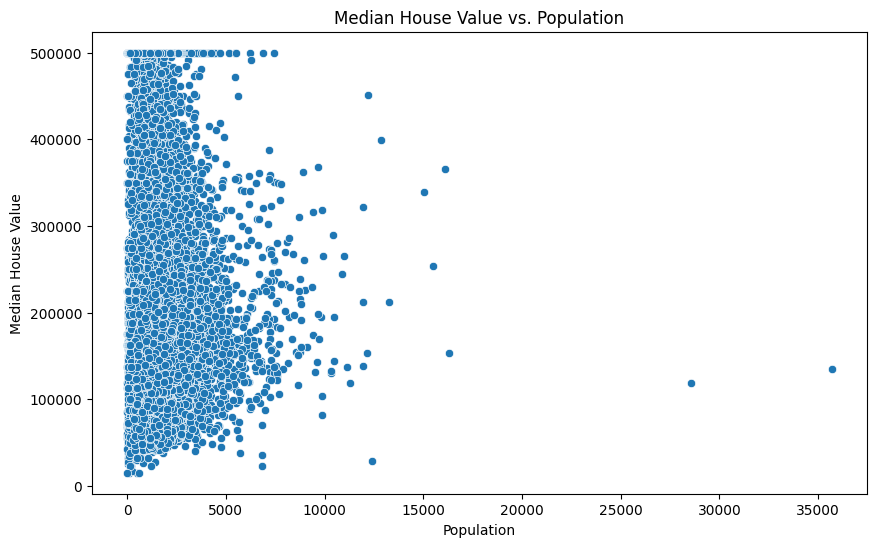

In [31]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=housingpPrices_cleaned, x='population', y='median_house_value')
ax.set_title('Median House Value vs. Population')  
ax.set_xlabel('Population')
ax.set_ylabel('Median House Value')
plt.show()

The relationship between population and median house value is unclear, with a dense cluster at lower population sizes and a few points at higher populations without a corresponding increase in median house value.

#### Model Training

In [34]:
X_income = housingpPrices_cleaned[['median_income']]
X_population = housingpPrices_cleaned[['population']]
X_households = housingpPrices_cleaned[['households']]

y_value = housingpPrices_cleaned['median_house_value']

regressionIncome = LinearRegression()
regressionPopulation = LinearRegression()
regressionHouseholds = LinearRegression()


#### Fitting the models

In [35]:
regressionIncome.fit(X_income, y_value)
regressionPopulation.fit(X_population, y_value)
regressionHouseholds.fit(X_households, y_value)

LinearRegression()

### Coefficients and Intercepts

In [46]:

print('Median house value vs. Median income')
coef_income = regressionIncome.coef_
print('Coefficient: ',coef_income)

intercept_income = regressionIncome.intercept_
print('Intercept: ',intercept_income)

print('\nMedian house value vs. Population')
coef_population = regressionPopulation.coef_
print('Coefficient: ',coef_population)

intercept_population = regressionPopulation.intercept_
print('Intercept: ',intercept_population)

print('\nMedian house value vs. Households')
coef_households = regressionHouseholds.coef_
print('Coefficient: ',coef_households)

intercept_households = regressionHouseholds.intercept_
print('Intercept: ',intercept_households)

Median house value vs. Median income
Coefficient:  [41837.06607562]
Intercept:  44906.369450883474

Median house value vs. Population
Coefficient:  [-2.57718813]
Intercept:  210536.76952373653

Median house value vs. Households
Coefficient:  [19.59467786]
Intercept:  197078.17528902998


### Predictions

In [38]:
y_pred_income = regressionIncome.predict(X_income)
y_pred_population = regressionPopulation.predict(X_population)
y_pred_households = regressionHouseholds.predict(X_households)

### Model Evaluation

In [47]:
print('Median house value vs. Median income')
r2_income = r2_score(y_value, y_pred_income)
print('R-squared Value: ',r2_income)

mse_income = mean_squared_error(y_value, y_pred_income)
print('MSE: ',mse_income)

print('\nMedian house value vs. Population')
r2_population = r2_score(y_value, y_pred_population)
print('R-squared Value: ',r2_population)

mse_population = mean_squared_error(y_value, y_pred_population)
print('MSE: ',mse_population)

print('\nMedian house value vs. Households')
r2_households = r2_score(y_value, y_pred_households)
print('R-squared Value: ',r2_households)

mse_households = mean_squared_error(y_value, y_pred_households)
print('MSE: ',mse_households)

Median house value vs. Median income
R-squared Value:  0.47383326039767115
MSE:  7011035574.262171

Median house value vs. Population
R-squared Value:  0.0006400764538164738
MSE:  13316212234.87005

Median house value vs. Households
R-squared Value:  0.004211172765170024
MSE:  13268628301.121332


#### Summary Table:

| Model                                       | Intercept       | Slope          | R-squared   | Mean Squared Error |
|---------------------------------------------|-----------------|----------------|-------------|--------------------|
| Median House Value vs. Median Income        | 44,906.37       | 41,837.07      | 0.473833    | 7,011,035,574.26   |
| Median House Value vs. Population           | 210,536.77      | -2.58          | 0.000640    | 13,316,212,234.87  |
| Median House Value vs. Number of Households | 197,078.18      | 19.59          | 0.004211    | 13,268,628,301.12  |


### Visualization

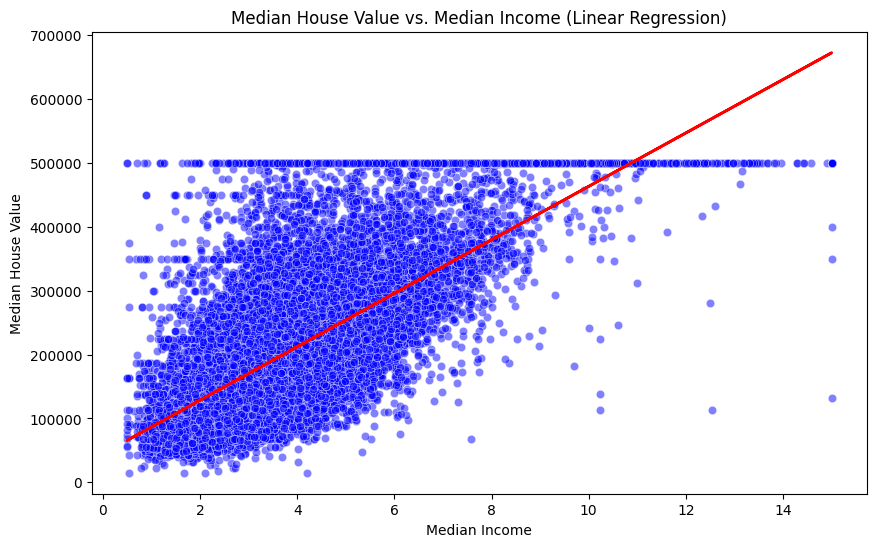

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_income['median_income'], y=y_value, color="blue", alpha=0.5)
plt.plot(X_income, y_pred_income, color="red", linewidth=2)
plt.title("Median House Value vs. Median Income (Linear Regression)")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()

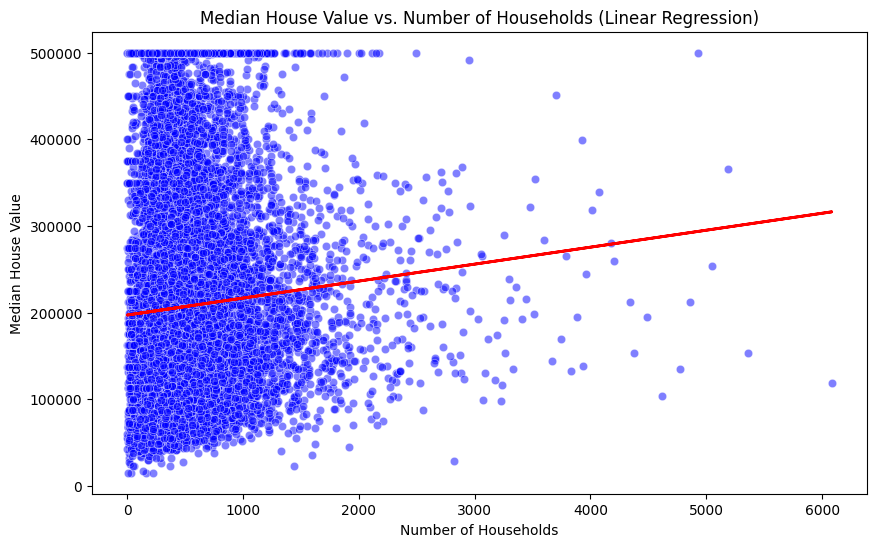

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_households['households'], y=y_value, color="blue", alpha=0.5)
plt.plot(X_households, y_pred_households, color="red", linewidth=2)
plt.title("Median House Value vs. Number of Households (Linear Regression)")
plt.xlabel("Number of Households")
plt.ylabel("Median House Value")
plt.show()


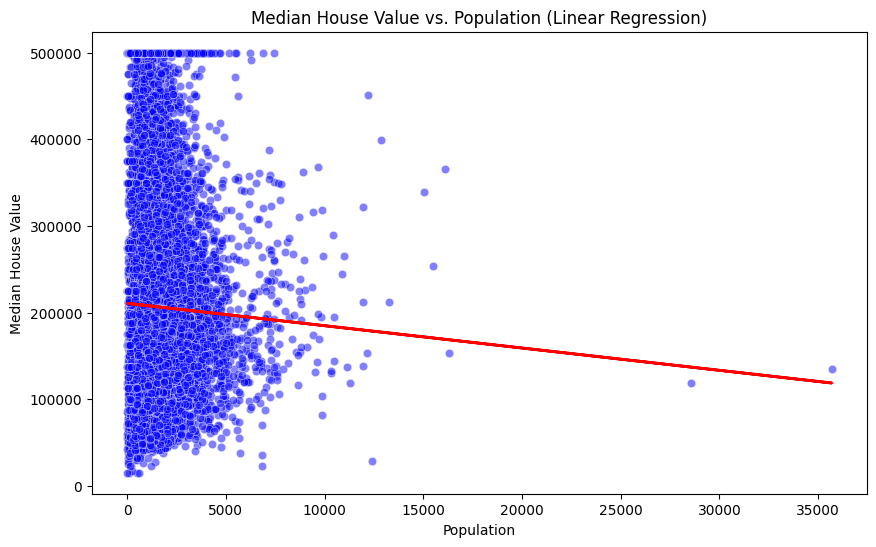

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_population['population'], y=y_value, color="blue", alpha=0.5)
plt.plot(X_population, y_pred_population, color="red", linewidth=2)
plt.title("Median House Value vs. Population (Linear Regression)")
plt.xlabel("Population")
plt.ylabel("Median House Value")
plt.show()

### Insights

**Median House Value vs. Median Income:**   
 The model's moderate R-squared value indicates that median income may account for roughly 47.38% of the variation in median house value. The positive coefficient shows that there is a moderately positive link. The scatter plot clearly indicates an upward trend, indicating that the median house value is significantly predicted by the median income. Nonetheless, the relatively high MSE indicates that there is still a significant amount of unpredictability that the model can not account for.


**Median House Value vs. Population:**   
The extremely low R-squared value suggests that, in this dataset, population size has very little ability to explain the median house value. Although there appears to be a very minor inverse link, the negative coefficient does not reach statistical significance. The scatter plot supports the large variation and absence of a distinct trend surrounding the regression line, which results in a high MSE.

**Median House Value vs. Number of Households:**   
The R-squared value is extremely low, similar to the population model, suggesting that the number of households has little bearing on the median house value. There isn't much of a relationship indicated by the modest positive coefficient. There is no discernible pattern in the scatter plot, and the high MSE indicates that the model does not adequately match the data.

In summary, the population and the number of households have very little predictive potential for median house value, but median income is the most reliable predictor among the three factors. These results are graphically supported by scatter plots and regression lines, where the median income line exhibits the most pronounced trend.